# Computational Methods in Physics
## Week 02
#### Prof. Michael Wood-Vasey
##### University of Pittsburgh, Department of Physics and Astronomy


## Homework 02
* Homework 2 is Due 2016-09-??, 23:59
* https://www.github.com/pitt1321/assignments/hmwk_02

## Please 'Watch' https://github.com/pitt1321/syllabus
* Go to above page and click on 'Watch'.
* I post class updates and useful tidbits as Issues.

## Where to Go for Help
* Barring apocalypse, you will spend the rest of your life with information and tutorials on almost every subject quickly available.
 - I am not teaching for the apocalpyse.
* You will spend most of your life not in the classroom.
* My job is to teach you how to learn on your own.
* If there is a video explaining something: **watch it**.
* If there is a document explaining something: **read it**.
* Our time together is valuable for its opportunity for **interaction**.

## Where to Go for Help
* I will be around during "working time" during each class after lecture time.
* Office hours: Wednesday 11:00-12:00
* Make an appointment to meet with me.
* File Issues on homework and projects to ask for help from others.
* Give help to others.
* Lots of Python help available online!
 - http://www.python.org/
 - http://numpy.scipy.org/

## hmwk_01 grading
  * In principle I'd like to use Pull Request comments
    - But I realize, having tried it, that everyone will get all of the comments, which is a bit more public than I'd like (and will quickly get confusing and redundant).
    - I'm working on figuring this out and will have updates.
  
  * If you had trouble submitting hmwk_01, **solve that today**.  
    - Before you leave today, make sure you can `fork`, `clone`, `add`+`commit`, and `push`/sync back to your fork on GitHub.
  * How much time did hmwk_01 take you:  > 2 hours; > 4 hours; > 8 hours?


## Arrays and Numpy

* Numbers are more efficiently stored and manipulated in `array`s than in `list`s or `tuple`s.
* We will use arrays created by the NumPy library, which is the standard for arrays in Python.

## Plotting

* `matplotlib` is the main 2-D plotting package in Python.
* Interactive Tutorial and exercise on plotting...
* See `python_introduction_subset_numpy.pdf`

## Today we will
* Learn to plot (visualize) function curves
* Learn to store data in arrays (lists)

* Curves y = f (x) are visualized by drawing straight line between consecutive points along the curve
* We need to store the coordinates of the points along the curve in lists or arrays x and y
* Arrays are like lists, but much computationally more efficient
 - The tradeoff is that they are less flexible.
* When we need to compute with large amounts of numbers, we store the numbers in arrays and compute with arrays – this gives shorter and faster code

Example Matplotlib

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.linspace(0, 100)
print(type(a))
print(len(a))

<class 'numpy.ndarray'>
50


In [3]:
np.linspace?

In [ ]:
a = np.linspace(0, 100, 100)
print(a)

In [ ]:
a = np.linspace(0, 100, 101)
print(a)

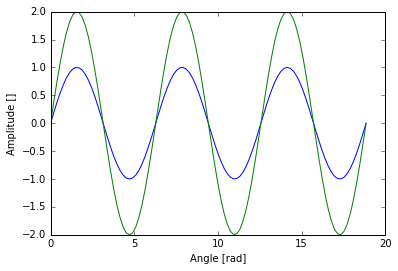

In [13]:
x = np.linspace(0, 3*2*np.pi, 101)
y = np.sin(x)
plt.plot(x, y)
plt.plot(x, 2*y)
plt.xlabel("Angle [rad]")
plt.ylabel("Amplitude []")

### Next week we'll talk about how computers actually store numbers:
## An infinite number line in finite space

* How do computers store numbers?

* Computers fundamentally think in bits = (0,1)
* With $N$ bits, we can represent $2^N$ numbers
* Let's start with integers:
  - E.g., with 1 bit we can represent $[0,1]\rightarrow[0,1]$
  - with 2 bits, we can represent $[00,01,10,11]\rightarrow[0,1,2,3]$
  - How many numbers can we represent with 4 bits?  8 bits?
  - $[0,..,2^N -1]$
* Wait, how do we represent $-1$?   Hmmm...
  - The above scheme was a choice.  In principle, we could have picked any relation. 
  - But it's really helpful to choose one that makes binary arithmetic easy.
    1. In our unsigned int scheme, $0110+1000 = 1110 \rightarrow 6+8=14$
    2. Adding $0001$ to $0110$ results in number bigger than $0110$.
      - In other words, adding $0001$ moves "rightward" along the number line.
  - It would be nice if we could maintain that for our representation of negative numbers

In [14]:
n = np.array([1,2,4,8,16,32,64,128], dtype=np.int64)
type(n[0])

numpy.int64

In [15]:
2**n

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


array([                   2,                    4,                   16,
                        256,                65536,           4294967296,
       -9223372036854775808, -9223372036854775808])

## Negative numbers and Two's-Complement
  * Adding $0001$ moving "rightward" on the number line sounds trivial
    - But it's not a property of the most obvious thing you might suggest!
  * The first thing I would think of, is to steal the first binary digit to serve as a sign bit.
  * Naive Proposal:  $0110 \rightarrow 6$ and $1110 \rightarrow -6$
    - Let's check out our criteria 1 & 2.  The positive numbers $0000,..,0111$ satisfy.
    - Uh oh...
    1. $1100+1010=0110 \rightarrow -4 + -2 = 6$  Wrong.  
        [Note: The carry bit just shifts off to be discarded to the left.]
    2. $1100+0001=1101 \rightarrow -4 + 1 = -5$  Wrong, and doesn't move rightward. 

### Two's Complement:  $1010 \rightarrow -6$
  1. Take binary representation of positive integer and invert: $0110 \rightarrow 1001$
  2. Add 1: $1001+0001 \rightarrow 1010$.
    - Let's check out the bit arithmetic.
      1. $1100+1110=1010 \rightarrow -4 + -2 = -6$  Good.
      2. $1100+0001=1101 \rightarrow -4 +  1 = -3$  Good.
    - Why add 1?
      * Because $1111+0001=0000$.  Why do I say that:
      * We want $+5 + -5 = 0$.  If we just took inverse, then $0101+1010=1111$
        But if $-5\leftarrow1011$, then $+5 + -5\leftarrow0101+1011=0000$.  
        Excellent.
     

### Integers
1. In practice integers are 32 bit or 64 bit

In [16]:
print("32-bit Unsigned: (%12d, %12d)" % (     0, 2**32 -1))
print("32-bit Signed:   (%12d, %12d)" % (-2**31, 2**31 -1))
print("64-bit Unsigned: (%20d, %20d)" % (     0, 2**64 -1))
print("64-bit Signed:   (%20d, %20d)" % (-2**63, 2**63 -1))

32-bit Unsigned: (           0,   4294967295)
32-bit Signed:   ( -2147483648,   2147483647)
64-bit Unsigned: (                   0, 18446744073709551615)
64-bit Signed:   (-9223372036854775808,  9223372036854775807)


### [Floating point material adapted from "Introductory Computational Science" by Rubin Landau, EPIC/OSU 2005